<a href="https://colab.research.google.com/github/AdemolaAri/machineLearning/blob/master/K_Nearest_neighbors_UniversalBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>K-Nearest Neighbors: Python</center></h1>

<h2> What is K-Nearest Neighbors</h2>
<b> K-Nearest Neighbors</b> is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>

Lets load required libraries

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

Universal Bank is a relatively young bank growing rapidly in terms of overall
customer acquisition. The majority of these customers are liability customers (depositors) with varying
sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and
the bank is interested in expanding ways of converting its liability customers to personal loan customers
(while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise smarter campaigns
with better target marketing.

The file UniversalBank.csv contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities, etc.),
and the customer response to the last personal loan campaign (personal loan). Among these 5000
customers, only 480 (9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 [See the full data description here](https://github.com/AdemolaAri/machineLearning/blob/datasets/Universal%20Bank%20Data%20Description.docx)

Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [0]:
!wget -O UniversalBank.csv https://github.com/AdemolaAri/machineLearning/raw/8af9b894c94d5b1fbe49ad61ba46dde8dc82c7e5/UniversalBankDataset.csv

--2019-09-06 23:34:36--  https://github.com/AdemolaAri/machineLearning/raw/8af9b894c94d5b1fbe49ad61ba46dde8dc82c7e5/UniversalBankDataset.csv
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AdemolaAri/machineLearning/8af9b894c94d5b1fbe49ad61ba46dde8dc82c7e5/UniversalBankDataset.csv [following]
--2019-09-06 23:34:36--  https://raw.githubusercontent.com/AdemolaAri/machineLearning/8af9b894c94d5b1fbe49ad61ba46dde8dc82c7e5/UniversalBankDataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205669 (201K) [text/plain]
Saving to: ‘UniversalBank.csv’

UniversalBank.csv   100%[===================>] 200

### Load Data From CSV File  

In [0]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set 

In [0]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### 480 Customers Accepted Personal Loan offered in the last campaign
#### 4520 Customers Rejected Personal Loan offered in the last campaign


You can easily explore your data using visualization techniques:

In [0]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Feature set

Lets define feature sets, X:

In [0]:
df.columns
X = df[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 
         'Family', 'CCAvg', 'Education', 'Mortgage', 
         'Securities Account', 'CD Account', 'Online', 'CreditCard']]
print(X[:5])
y = df['Personal Loan']
print(y[:5])

   ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 13 columns]
0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64


## Normalize Data 

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.73170443, -1.77441684, -1.66607847, -0.53822878, -0.96411408,
         1.39741398, -0.19338544, -1.04907792, -0.55552393,  2.92891517,
        -0.25354028, -1.21661774, -0.64531434],
       [-1.73101161, -0.02952359, -0.09633022, -0.8641094 , -1.44393158,
         0.52599094, -0.25061056, -1.04907792, -0.55552393,  2.92891517,
        -0.25354028, -1.21661774, -0.64531434],
       [-1.73031879, -0.55299157, -0.44516316, -1.36379301,  0.73881384,
        -1.21685513, -0.53673618, -1.04907792, -0.55552393, -0.34142334,
        -0.25354028, -1.21661774, -0.64531434],
       [-1.72962597, -0.90197022, -0.96841258,  0.56976533,  0.45224308,
        -1.21685513,  0.43609092,  0.14170292, -0.55552393, -0.34142334,
        -0.25354028, -1.21661774, -0.64531434],
       [-1.72893315, -0.90197022, -1.05562082, -0.62513027, -0.85900671,
         1.39741398, -0.53673618,  0.14170292, -0.55552393, -0.34142334,
        -0.25354028, -1.21661774,  1.54963239]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_validation.shape,  y_validation.shape)

Train set: (3500, 13) (3500,)
Test set: (1500, 13) (1500,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

#### Import library 

Classifier implementing the k-nearest neighbors vote.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:

In [0]:
k = 4
#Train Model and Predict  
modelKnn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
modelKnn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Predicting
we can use the model to predict the validation set:

In [0]:
yhat = modelKnn.predict(X_validation)
yhat[0:5]

array([0, 0, 0, 0, 0])

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [0]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, modelKnn.predict(X_train)))
print("Validation set Accuracy: ", metrics.accuracy_score(y_validation, yhat))

Train set Accuracy:  0.9571428571428572
Validation set Accuracy:  0.952


#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [0]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    modelKnn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=modelKnn.predict(X_validation)
    mean_acc[n-1] = metrics.accuracy_score(y_validation, yhat)

    
    std_acc[n-1]=np.std(yhat==y_validation)/np.sqrt(yhat.shape[0])

mean_acc

array([0.952     , 0.95133333, 0.96333333, 0.952     , 0.95866667,
       0.95733333, 0.958     , 0.95666667, 0.956     , 0.95533333])

#### Plot  model accuracy  for Different number of Neighbors 

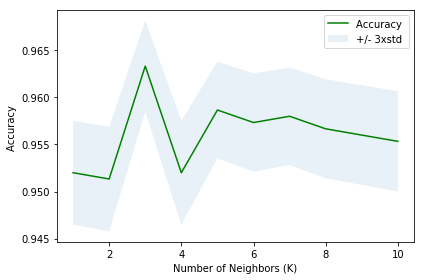

In [0]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [0]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9633333333333334 with k= 3


<h2>Pros and Cons of K-Nearest Neighbor</h2>

<h3> Pros </h3>
* Intuitive, simple, explainable. <br>
* Widely applicable. <br>
* Easily updated, automatically adapts to changing data. <br>

<h3> Cons </h3>
* Sensitive to scales of the variables. <br>
* Heavy reliance on distance function
* Need entire dataset to classify new instance. It could be costly
to search and to store the dataset. <br>

<h3>Thanks for reading!</h3>

<h4>Author:  <a href="https://www.linkedin.com/in/ademolabuwo">Ademola Arigbabuwo</a></h4>
